In [2]:
#importing classic libraries and checking the files in our env
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
# ignore warnings to keep the outputs clean :)

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset
We're going to use the pandas read_csv() method :

In [4]:
df = pd.read_csv('./heart.csv')

## Exploratory Data Analysis

In [67]:
print('Shape of our dataset : ', df.shape)

Shape of our dataset :  (303, 14)


Our dataset has 303 tuples each composed of 14 variables. Now let's preview our dataset :

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset is built as follows :

age : age in years

sex : (1 = male; 0 = female)

cp : chest pain type

trestbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

target : 1 or 0 (has heart disease or not)

### Statistical properties of our dataset

In [70]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see the columns we have and decide the ones that we will keep :

In [71]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [72]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Given the type of each variables we will keep:

-age
-thalach
-oldpeak
-chol
-trestbps
-target (our dependant variable)

In [73]:
df = df[['age', 'thalach', 'chol', 'oldpeak', 'trestbps', 'target']]

## Univariate Analysis

Check the number of unique values in our dependant variable :

In [74]:
print(df['target'].nunique())
df['target'].unique()

2


array([1, 0], dtype=int64)

There are 2 unique values in the target variable. 0 and 1 which represent the presence of heart disease in an individual.

In [75]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

Similarly, 0 stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

We can visualize this information below.

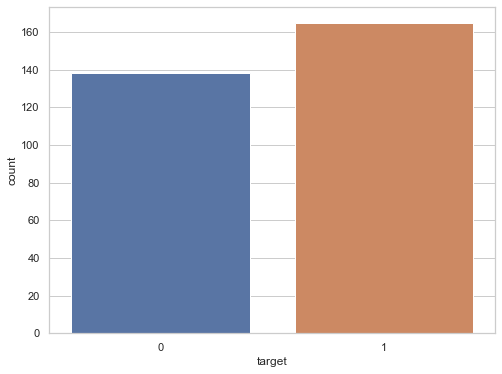

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

### Frequency distribution of each variable regarding the target variable.

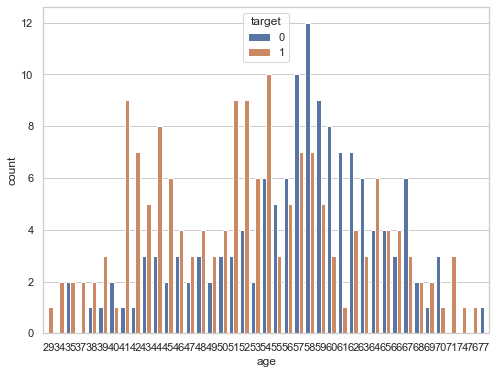

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='age', hue='target', data=df)
plt.show()

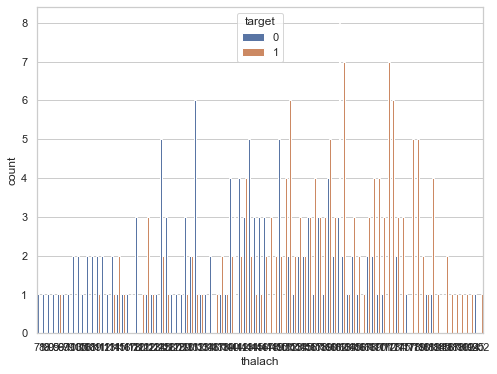

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='thalach', hue='target', data=df)
plt.show()

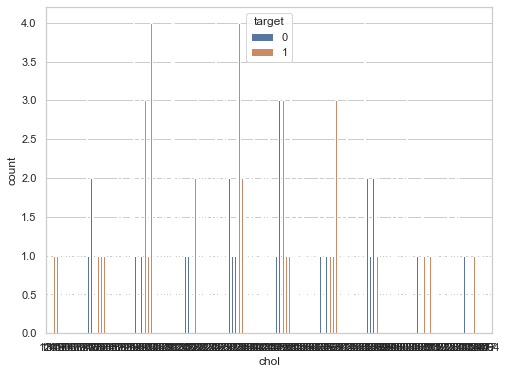

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='chol', hue='target', data=df)
plt.show()

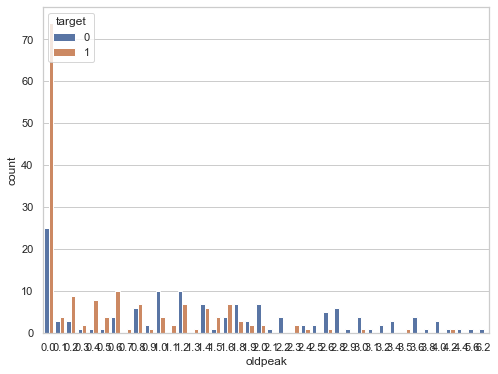

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='oldpeak', hue='target', data=df)
plt.show()

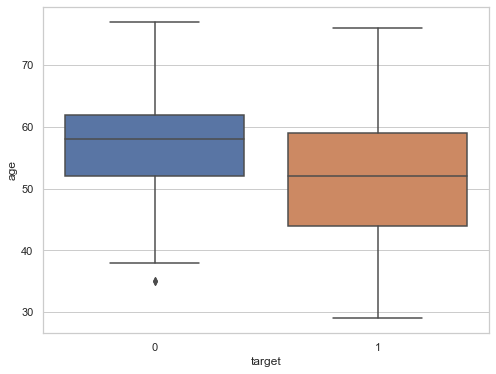

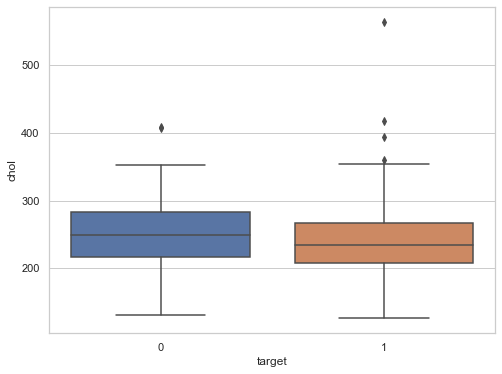

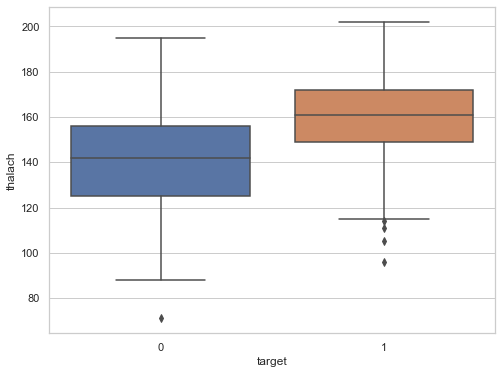

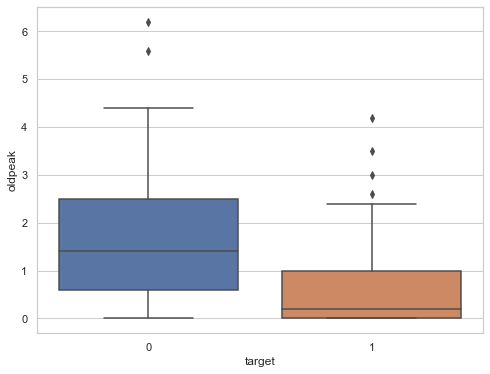

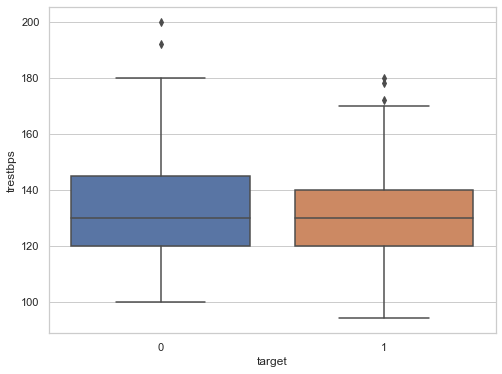

In [81]:
# Dealing with outliers :
f, ax= plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="chol", data=df)
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="oldpeak", data=df)
plt.show()

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="trestbps", data=df)
plt.show()

There are outliers. We will now filter the data

In [82]:
df = df[df.trestbps < 172]
df = df[df.chol < 394]
df = df[df.thalach > 71]
df = df[df.oldpeak < 4.2]
df

,age,thalach,chol,oldpeak,trestbps,target
0,63,150,233,2.3,145,1
1,37,187,250,3.5,130,1
2,41,172,204,1.4,130,1
3,56,178,236,0.8,120,1
4,57,163,354,0.6,120,1
...,...,...,...,...,...,...
298,57,123,241,0.2,140,0
299,45,132,264,1.2,110,0
300,68,141,193,3.4,144,0
301,57,115,131,1.2,130,0


## Normality Hypothesis on variable distribution regarding Normal kernel distribution (statistical tests and Q-Q distribution)

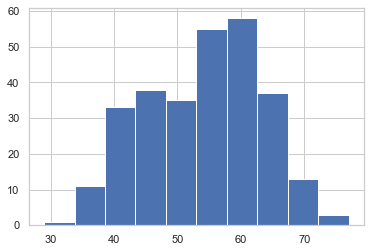

In [83]:
# Normality hypothesis : visual assesment
from matplotlib import pyplot as plt

plt.hist(df['age'])
plt.show()

# doesn't seem to be following a normal distribution

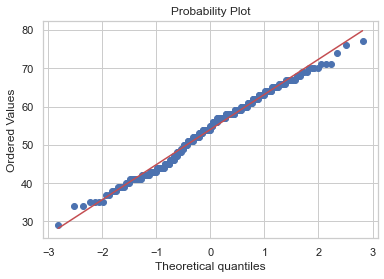

In [84]:
# What is a quantile-quantile plot? It is a plot that shows the distribution of a given data against normal distribution
# namely existing quantiles vs normal theoretical quantiles.

import pylab
import scipy.stats as stats

stats.probplot(df['age'], dist="norm", plot=pylab)
pylab.show()

In [85]:
#Kolmogorov Smirnov Statistical Test 
from scipy.stats import kstest

result = (kstest(df['age'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")

#it is useless because K-S test is too meticulous our data has no normal distribution at all

K-S statistic: 1.0
p-value: 0.0


In [86]:
#Anderson Darling Satistical Test
from scipy.stats import anderson

result = (anderson(df['age'], dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

A-D statistic: 1.323845981881675
Critical values: [0.568 0.647 0.776 0.906 1.077]
Significance levels: [15.  10.   5.   2.5  1. ]


In [87]:
# Shapiro Wilk Statistical Test
from scipy.stats import shapiro

result = (shapiro(df['age']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.9876024723052979
p-value: 0.015377289615571499


The Q-Q plot shows that the variable age has an almost normal distribution
The statistical tests have given us the following results :
    
- K-S : un-exploitable
    
- A-D : stat(5%) > 0.777 -> Normality Rejected, the result is higher than every critical values
    
- S-W : p-value ~ 0.0058 -> Normality Rejected

### Univariate analysis of the other variables : chol, thalach, oldpeak, trestbps (repeating same process as for variable age)

#### Variable Chol

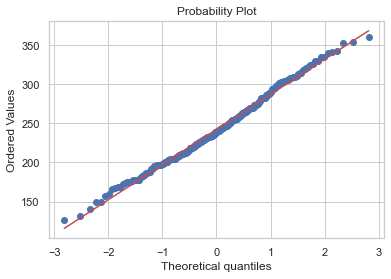

In [88]:
stats.probplot(df['chol'], dist="norm", plot=pylab)
pylab.show()

In [89]:
#Anderson Darling Satistical Test
result = (anderson(df['chol'], dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

# Shapiro Wilk Statistical Test
result = (shapiro(df['chol']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

A-D statistic: 0.6347927022949307
Critical values: [0.568 0.647 0.776 0.906 1.077]
Significance levels: [15.  10.   5.   2.5  1. ]
S-W statistic: 0.9928416609764099
p-value: 0.19093990325927734


The Q-Q plot shows that the variable chol has an almost normal distribution
The statistical tests have given us the following results :

- A-D : stat(5%) < 0.777 -> Fail to reject normality

- S-W : p-value > 0.005 -> Fail to reject normality

So it appears that the variable chol has a normal distribution


#### Variable Thalach

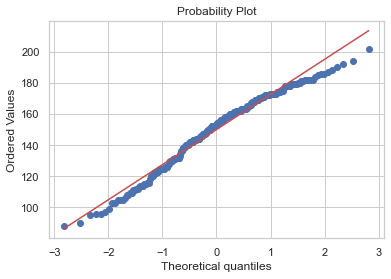

In [90]:
stats.probplot(df['thalach'], dist="norm", plot=pylab)
pylab.show()

In [91]:
#Anderson Darling Satistical Test
result = (anderson(df['thalach'], dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

# Shapiro Wilk Statistical Test
result = (shapiro(df['thalach']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

A-D statistic: 2.377979596137095
Critical values: [0.568 0.647 0.776 0.906 1.077]
Significance levels: [15.  10.   5.   2.5  1. ]
S-W statistic: 0.9738879799842834
p-value: 4.7278605052269995e-05


The Q-Q plot shows that the variable thalach doesn't have a normal distribution
The statistical tests have given us the following results :

- A-D : stat(5%) > 0.776 -> Normality Rejected because the value is greater than all critical values.

- S-W : p-value < 0.005 -> Normality Rejected

So it appears that the variable thalach doesn't have a normal distribution

#### Variable Oldpeak

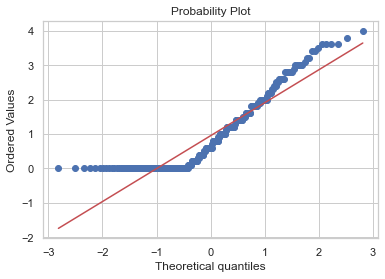

In [92]:
stats.probplot(df['oldpeak'], dist="norm", plot=pylab)
pylab.show()

In [93]:
#Anderson Darling Satistical Test
result = (anderson(df['oldpeak'], dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

# Shapiro Wilk Statistical Test
result = (shapiro(df['oldpeak']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

A-D statistic: 13.737141202044313
Critical values: [0.568 0.647 0.776 0.906 1.077]
Significance levels: [15.  10.   5.   2.5  1. ]
S-W statistic: 0.8549277782440186
p-value: 1.1988445878854666e-15


The Q-Q plot shows that the variable oldpeak has anything but a normal distribution
The statistical tests have given us the following results :

- A-D : stat(5%) > 0.776 -> Normality Rejected because the value is greater than all critical values.

- S-W : p-value < 0.005 -> Normality Rejected

So it appears that the variable oldpeak doesn't have a normal distribution

#### Variable Trestbps

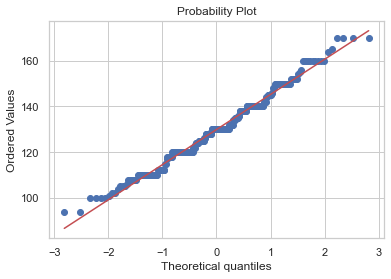

In [94]:
stats.probplot(df['trestbps'], dist="norm", plot=pylab)
pylab.show()

In [95]:
#Anderson Darling Satistical Test
result = (anderson(df['trestbps'], dist='norm'))

print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

# Shapiro Wilk Statistical Test
result = (shapiro(df['trestbps']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

A-D statistic: 1.446457202895374
Critical values: [0.568 0.647 0.776 0.906 1.077]
Significance levels: [15.  10.   5.   2.5  1. ]
S-W statistic: 0.9842588901519775
p-value: 0.0032714386470615864


The Q-Q plot shows that the variable trestbps might have a normal distribution
The statistical tests have given us the following results :

- A-D : stat(5%) > 0.776 -> Normality Rejected because the value is greater than all critical values.

- S-W : p-value < 0.005 -> Normality Rejected

So it appears that the variable trestbps doesn't have a normal distribution

### Conclusion on Univariate Analysis

The variables trestbps, oldpeak, thalach and age don't have a normal distribtion. The variable chol has a normal distribution

## Bivariate Analysis

### Estimate the correlation coefficients

In [96]:
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target      1.000000
thalach     0.424381
chol       -0.109764
trestbps   -0.113745
age        -0.226382
oldpeak    -0.435748
Name: target, dtype: float64

We can see that:

- thalach is midly positively correlated with target

- oldpeak is midly negatively correlated with target

- the other variables are only slightly negatively correlated with target 

## Logistic Regression analysis

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl


#### Analyzing the RegLog of target over age

In [98]:
feature_col = ['age']
X = df[feature_col]
y = df.target

In [102]:
logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.intercept_)
print(logreg.coef_)

[3.07738453]
[[-0.05227276]]
[0 1]
True


We find the same values for the intercept and the coefficients of the fitted model ad we found in SAS and R. 

#### Analyzing the RegLog of target over the other variables

In [103]:
#Thalach
feature_col = ['thalach']
X = df[feature_col]
y = df.target

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.intercept_)
print(logreg.coef_)

[-6.33792354]
[[0.04399371]]


In [104]:
#Chol
feature_col = ['chol']
X = df[feature_col]
y = df.target

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.intercept_)
print(logreg.coef_)

[1.45145044]
[[-0.00499052]]


In [105]:
#Oldpeak
feature_col = ['oldpeak']
X = df[feature_col]
y = df.target

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.intercept_)
print(logreg.coef_)

[1.16373256]
[[-0.97783812]]


In [106]:
#Trestbps
feature_col = ['trestbps']
X = df[feature_col]
y = df.target

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.intercept_)
print(logreg.coef_)

[2.20070646]
[[-0.01506556]]


We notice that the results in the RegLog models are the same we got in SAS or in R (if we consider a specific rounding). 
- thalach will influence positively the probability that a person has a heart disease
- oldpeak will influence negatively the porbability that a person has a heart disease
- the variables chol, age and oldpeak have no significant impact on the probability that a person has a heart disease

We weren't able to retrieve p-values and chiSq values because of how the scikit-learn setup the LogisticRegression() model.

## Multivariate Analysis

### Principal Component Analysis using Mr Lardjane's code :

Text(0, 0.5, 'Second Principal Component')

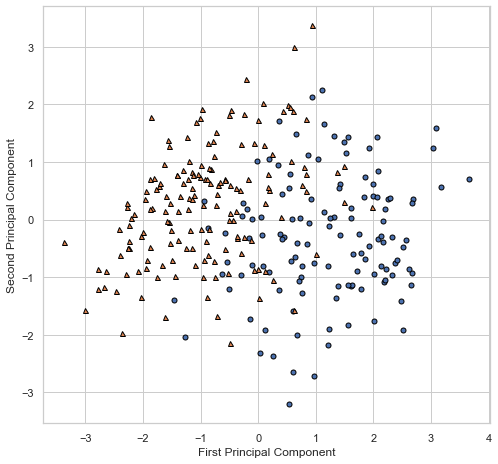

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import colorConverter

#scaling our data

scaler = StandardScaler()
scaler.fit(df)

X_scaled = scaler.transform(df)

pca = PCA(n_components=3)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

def discrete_scatter(x1, x2, y=None, markers=None, s=5, ax=None, labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    if ax is None:
        ax =plt.gca()
    
    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>']*10
    
    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y
    
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color=c

        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"
        
        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
        label=labels[i], alpha=alpha, c = color,
        markeredgewidth=markeredgewidth,
        markeredgecolor=markeredgecolor)[0])
    
    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines


plt.figure(figsize=(8,8))
discrete_scatter(X_pca[:,0], X_pca[:,1], df.target)
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")


### Principal Component Analysis using 3Dplot lib and less code

In [118]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,0.838659,0.497490,1.218795,1.0
1,-0.935243,-0.702797,0.217959,1.0
2,-1.495699,-0.702137,0.752549,1.0
3,-1.213875,0.183623,-0.004774,1.0
4,-0.515445,1.812986,-1.894337,1.0


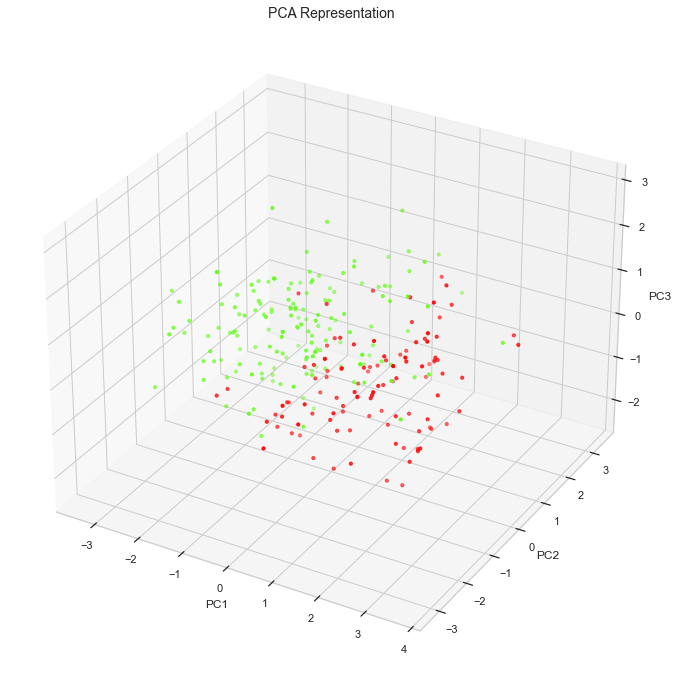

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['target'], cmap = 'prism', s=10)